In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,  LSTM,  Dropout
%matplotlib inline
from keras import metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from plot_keras_history import plot_history
from keras.layers.convolutional import Conv1D, UpSampling1D
from keras.layers.pooling import MaxPooling1D

Using TensorFlow backend.
C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
path = os.getcwd()
print(path)

C:\home\program\11-19


In [3]:
os.chdir('../')
os.chdir('../')

In [4]:
df = pd.read_csv('program/stock2.csv', encoding="shift_jis")
L = len(df)
Y = df.iloc[:, 4]  # 終値の列のみ抽出する。
Y = np.array(Y)  # numpy配列に変換する。
Y = Y.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [5]:
df2 = pd.read_csv('program/stock2UFJ.csv', encoding="shift_jis")
L2 = len(df2)
Y2 = df2.iloc[:, 4]  # 終値の列のみ抽出する。
Y2 = np.array(Y2)  # numpy配列に変換する。
Y2 = Y2.reshape(-1, 1)  # 行列に変換する。（配列の要素数行×1列）

In [6]:
X1 = Y[0:L-3, :]  # 予測対象日の3日前のデータ
X2 = Y[1:L-2, :]  # 予測対象日の2日前のデータ
X3 = Y[2:L-1, :]  # 予測対象日の前日データ
Y = Y[3:L, :]  # 予測対象日のデータ
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

In [7]:
X21 = Y2[0:L2-3, :]  # 予測対象日の3日前のデータ
X22 = Y2[1:L2-2, :]  # 予測対象日の2日前のデータ
X23 = Y2[2:L2-1, :]  # 予測対象日の前日データ
Y2 = Y2[3:L2, :]  # 予測対象日のデータ
X2 = np.concatenate([X21, X22, X23], axis=1)  # numpy配列を結合する。

In [8]:
scaler = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler2 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler2.fit(X2)  # スケーリングに使用する最小／最大値を計算する。
X2 = scaler2.transform(X2)  # Xをを0～1の範囲にスケーリングする。

In [9]:
scaler1 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。
scaler3 = MinMaxScaler()  # データを0～1の範囲にスケールするための関数。
scaler3.fit(Y2)  # スケーリングに使用する最小／最大値を計算する。
Y2 = scaler3.transform(Y2)  # Yをを0～1の範囲にスケーリングする。

In [10]:
X = np.reshape(X, (X.shape[0], 1, X.shape[1]))  # 3次元配列に変換する。
X2 = np.reshape(X2, (X2.shape[0], 1, X2.shape[1]))  # 3次元配列に変換する。

In [11]:
# train, testデータを定義
X_train = X[:350, :, :]
X_test = X[350:, :, :]
Y_train = Y[:350, :]
Y_test = Y[350:, :]
X2_train = X2[:350, :, :]
X2_test = X2[350:, :, :]
Y2_train = Y2[:350, :]
Y2_test = Y2[350:, :]

In [12]:
model = Sequential()
model.add(LSTM(10, activation = 'tanh', input_shape = (1,3), recurrent_activation= 'hard_sigmoid'))
model.add(Dense(1))

Epoch 1/50
 - 0s - loss: 0.3640 - mean_absolute_error: 0.6002
Epoch 2/50
 - 0s - loss: 0.2797 - mean_absolute_error: 0.5261
Epoch 3/50
 - 0s - loss: 0.2182 - mean_absolute_error: 0.4644
Epoch 4/50
 - 0s - loss: 0.1659 - mean_absolute_error: 0.4043
Epoch 5/50
 - 0s - loss: 0.1206 - mean_absolute_error: 0.3440
Epoch 6/50
 - 0s - loss: 0.0822 - mean_absolute_error: 0.2830
Epoch 7/50
 - 0s - loss: 0.0509 - mean_absolute_error: 0.2217
Epoch 8/50
 - 0s - loss: 0.0278 - mean_absolute_error: 0.1610
Epoch 9/50
 - 0s - loss: 0.0126 - mean_absolute_error: 0.1055
Epoch 10/50
 - 0s - loss: 0.0044 - mean_absolute_error: 0.0564
Epoch 11/50
 - 0s - loss: 0.0015 - mean_absolute_error: 0.0297
Epoch 12/50
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0247
Epoch 13/50
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0247
Epoch 14/50
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0247
Epoch 15/50
 - 0s - loss: 0.0011 - mean_absolute_error: 0.0249
Epoch 16/50
 - 0s - loss: 0.0010 - mean_absolute_error: 0.0250
E

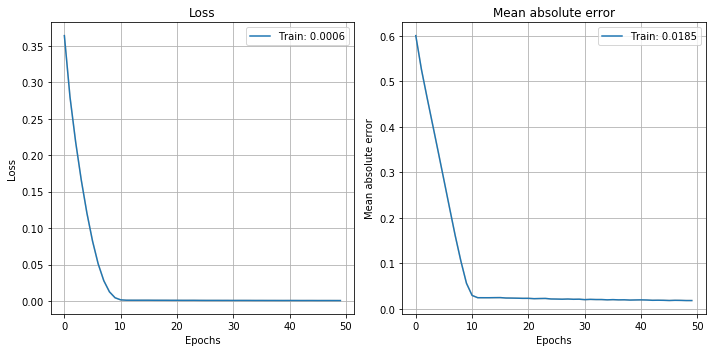

In [13]:
model.compile(loss= 'mean_squared_error', optimizer = 'rmsprop', metrics=[metrics.mae])
history = model.fit(X_train, Y_train, epochs=50, verbose=2).history
plot_history(history)
Predict = model.predict(X_test)

In [14]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y_train = scaler1.inverse_transform(Y_train)
Y_train = pd.DataFrame(Y_train)
Y_train.index = pd.to_datetime(df.iloc[3:353,0])

In [15]:
Y_test = scaler1.inverse_transform(Y_test)
Y_test = pd.DataFrame(Y_test)
Y_test.index = pd.to_datetime(df.iloc[353:,0])

In [16]:
Predict = scaler1.inverse_transform(Predict)
Predict = pd.DataFrame(Predict)
Predict.index=pd.to_datetime(df.iloc[353:,0])

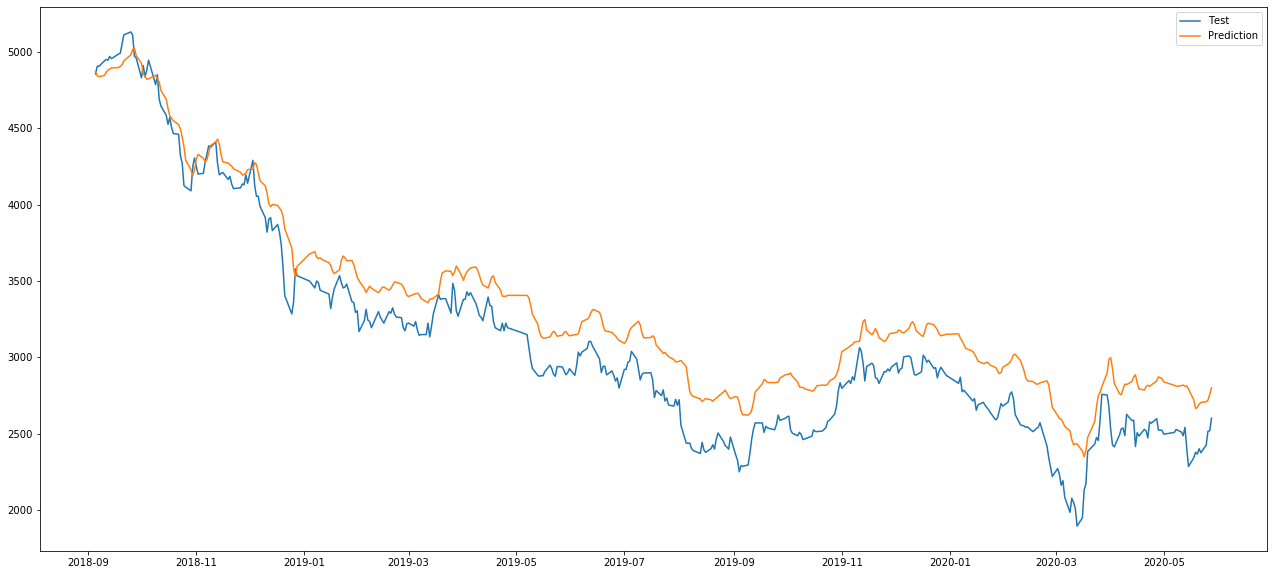

In [17]:
plt.figure(figsize=(22,10))
plt.plot(Y_test, label = 'Test')
plt.plot(Predict, label = 'Prediction')
plt.legend(loc='best')
plt.show()

Epoch 1/50
 - 0s - loss: 9.9480e-04 - mean_absolute_error: 0.0252
Epoch 2/50
 - 0s - loss: 8.6076e-04 - mean_absolute_error: 0.0231
Epoch 3/50
 - 0s - loss: 8.4376e-04 - mean_absolute_error: 0.0229
Epoch 4/50
 - 0s - loss: 7.5840e-04 - mean_absolute_error: 0.0218
Epoch 5/50
 - 0s - loss: 7.5597e-04 - mean_absolute_error: 0.0218
Epoch 6/50
 - 0s - loss: 6.9885e-04 - mean_absolute_error: 0.0212
Epoch 7/50
 - 0s - loss: 6.8638e-04 - mean_absolute_error: 0.0209
Epoch 8/50
 - 0s - loss: 6.9884e-04 - mean_absolute_error: 0.0209
Epoch 9/50
 - 0s - loss: 6.6494e-04 - mean_absolute_error: 0.0205
Epoch 10/50
 - 0s - loss: 6.5021e-04 - mean_absolute_error: 0.0199
Epoch 11/50
 - 0s - loss: 6.4162e-04 - mean_absolute_error: 0.0200
Epoch 12/50
 - 0s - loss: 6.4940e-04 - mean_absolute_error: 0.0202
Epoch 13/50
 - 0s - loss: 6.1034e-04 - mean_absolute_error: 0.0194
Epoch 14/50
 - 0s - loss: 6.2106e-04 - mean_absolute_error: 0.0196
Epoch 15/50
 - 0s - loss: 6.1853e-04 - mean_absolute_error: 0.0195
Epoc

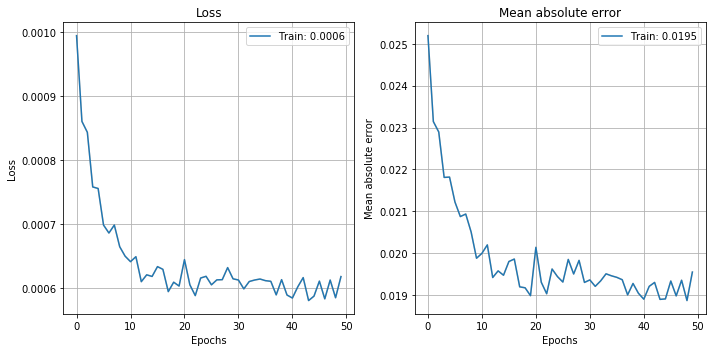

In [18]:
history = model.fit(X2_train, Y2_train, epochs=50, verbose=2).history
plot_history(history)
Predict2 = model.predict(X2_test)

In [19]:
# オリジナルのスケールに戻す、タイムインデックスを付ける。
Y2_train = scaler3.inverse_transform(Y2_train)
Y2_train = pd.DataFrame(Y2_train)
Y2_train.index = pd.to_datetime(df2.iloc[3:353,0])

In [20]:
Y2_test = scaler3.inverse_transform(Y2_test)
Y2_test = pd.DataFrame(Y2_test)
Y2_test.index = pd.to_datetime(df2.iloc[353:,0])

In [21]:
Predict2 = scaler3.inverse_transform(Predict2)
Predict2 = pd.DataFrame(Predict2)
Predict2.index=pd.to_datetime(df2.iloc[353:,0])

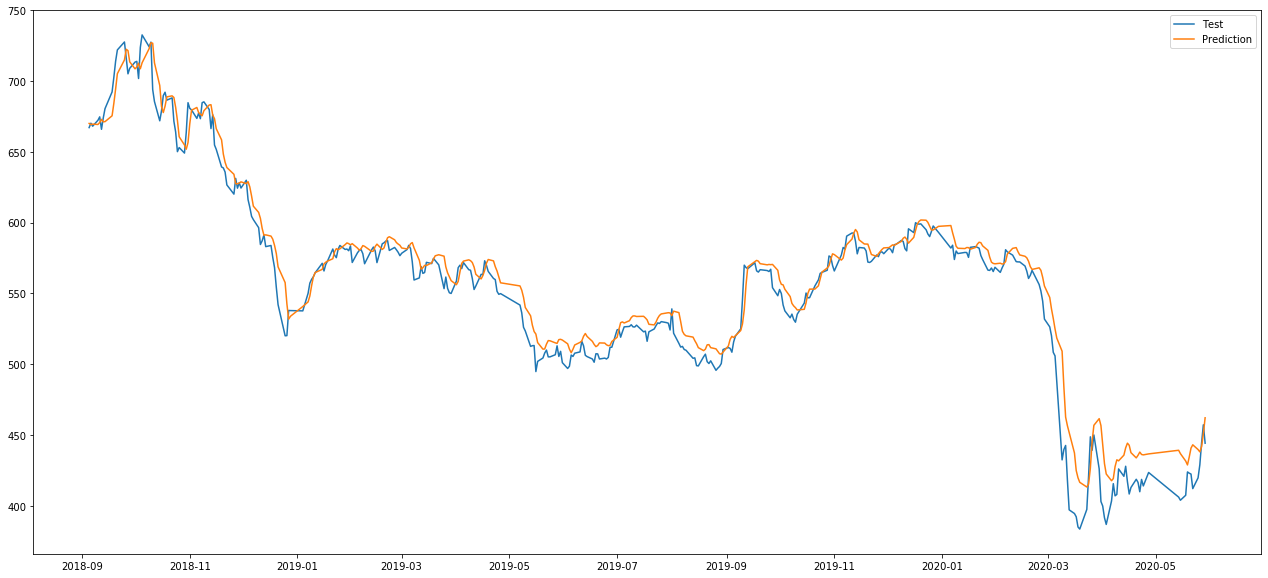

In [22]:
plt.figure(figsize=(22,10))
plt.plot(Y2_test, label = 'Test')
plt.plot(Predict2, label = 'Prediction')
plt.legend(loc='best')
plt.show()

# lstm+ARIMA,lstm,ARIMA

In [23]:
df['day'] = pd.to_datetime(df['day'], format='%Y/%m/%d')
timeSeries = df.loc[:, ["day","end"]]
timeSeries.index = timeSeries.day
ts = timeSeries.drop("day",axis=1)

In [24]:
from statsmodels.tsa.arima_model import ARIMA

arima_model = ARIMA(Predict[0], order=(2,0,2)).fit(dist=False)
arima_model2 = ARIMA(ts, order=(2,0,2)).fit(dist=False)
#arima_model3 = ARIMA(Predict[0], order=(5,0,5)).fit(dist=False)
#arima_model4 = ARIMA(ts, order=(5,0,5)).fit(dist=False)

C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\home\anaconda\envs\TF\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
arima_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    end   No. Observations:                  769
Model:                     ARMA(2, 2)   Log Likelihood               -4273.229
Method:                       css-mle   S.D. of innovations             62.451
Date:                Mon, 27 Jul 2020   AIC                           8558.459
Time:                        12:38:11   BIC                           8586.330
Sample:                             0   HQIC                          8569.186
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3711.4945    697.324      5.322      0.000    2344.765    5078.224
ar.L1.end      1.5913      0.088     18.048      0.000       1.418       1.764
ar.L2.end     -0.5922      0.088     -6.732      0.000      -0.765      -0.420
ma.L1.end     -0.5529      0.095     -5.850      0.000      -0.738      -0.368
ma.L2.end     -0.0388      0.033     -1.163      0.245      -0.104       0.027
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0022           +0.0000j            1.0022            0.0000
AR.2            1.6849           +0.0000j            1.6849            0.0000
MA.1            1.6236           +0.0000j            1.6236            0.0000
MA.2          -15.8700           +0.0000j           15.8700            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
forecast = arima_model.predict()
forecast2 = arima_model2.predict()
#forecast3 = arima_model3.predict()
#forecast4 = arima_model4.predict('2018-09-05', '2020-05-28')

In [27]:
y_forecasted = np.exp(arima_model.predict()/10)
y_truth = np.exp(Y_test['2018-09-05':'2020-05-28']/10)

In [28]:
y_truth[0]

day
2018-09-05    7.078985e+210
2018-09-06    1.050614e+213
2018-09-07    1.050614e+213
2018-09-10    3.479157e+214
2018-09-11    9.457330e+214
                  ...      
2020-05-22    1.705290e+103
2020-05-25    2.530875e+105
2020-05-26    2.266473e+109
2020-05-27    2.768276e+109
2020-05-28    1.113919e+113
Name: 0, Length: 416, dtype: float64

In [29]:
rmse = np.sqrt(((y_forecasted - y_truth[0]) ** 2).mean())
print('RMSE = {}'.format(round(rmse, 4)))

RMSE = inf


C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32066 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32066 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 20516 missing from current font.
  font.set_text(s, 0, flags=flags)


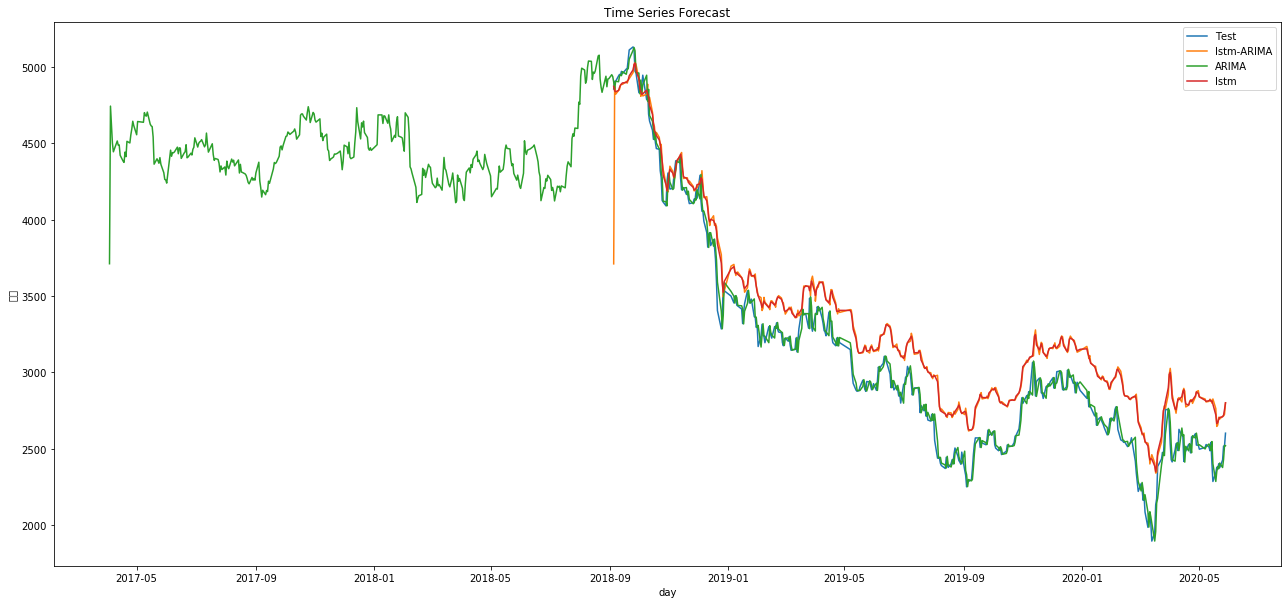

In [30]:
plt.figure(figsize=(22,10))
plt.plot(Y_test, label = 'Test')
plt.plot(forecast,label = "lstm-ARIMA")
plt.plot(forecast2,label = "ARIMA")
#plt.plot(forecast3,label = "lstm-ARIMA--5")
#plt.plot(forecast4,label = "ARIMA--5")
plt.plot(Predict, label = 'lstm')
plt.title("Time Series Forecast")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

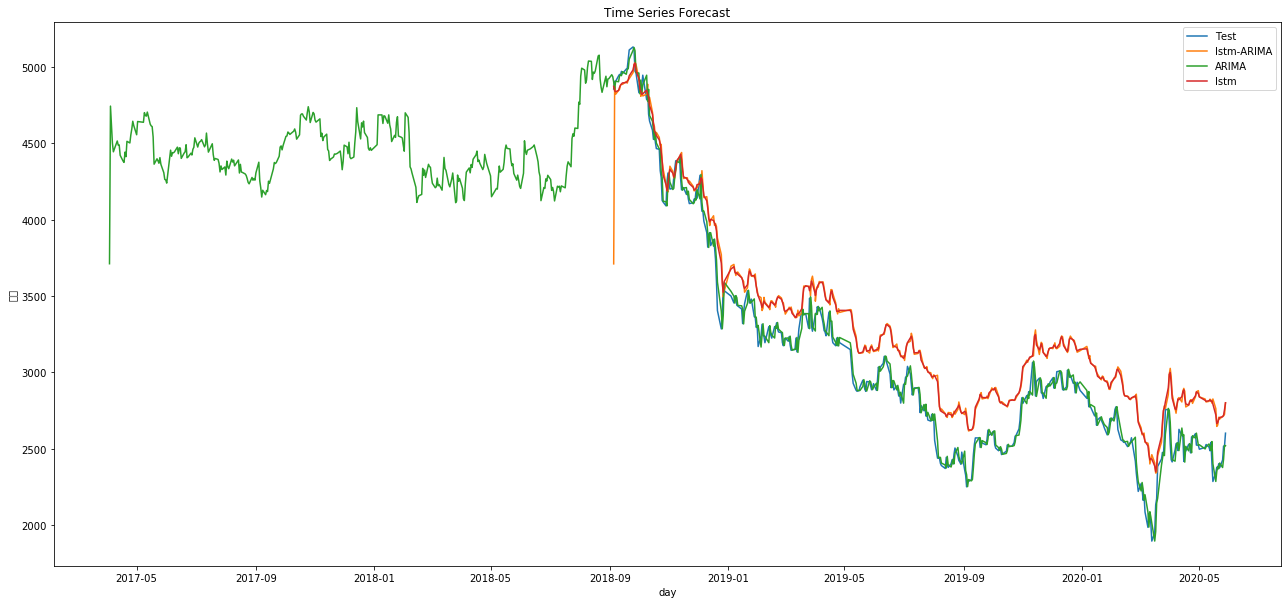

In [31]:
plt.figure(figsize=(22,10))
plt.plot(Y_test, label = 'Test')
plt.plot(forecast,label = "lstm-ARIMA")
plt.plot(forecast2,label = "ARIMA")
plt.plot(Predict, label = 'lstm')
plt.title("Time Series Forecast")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

NameError: name 'forecast3' is not defined

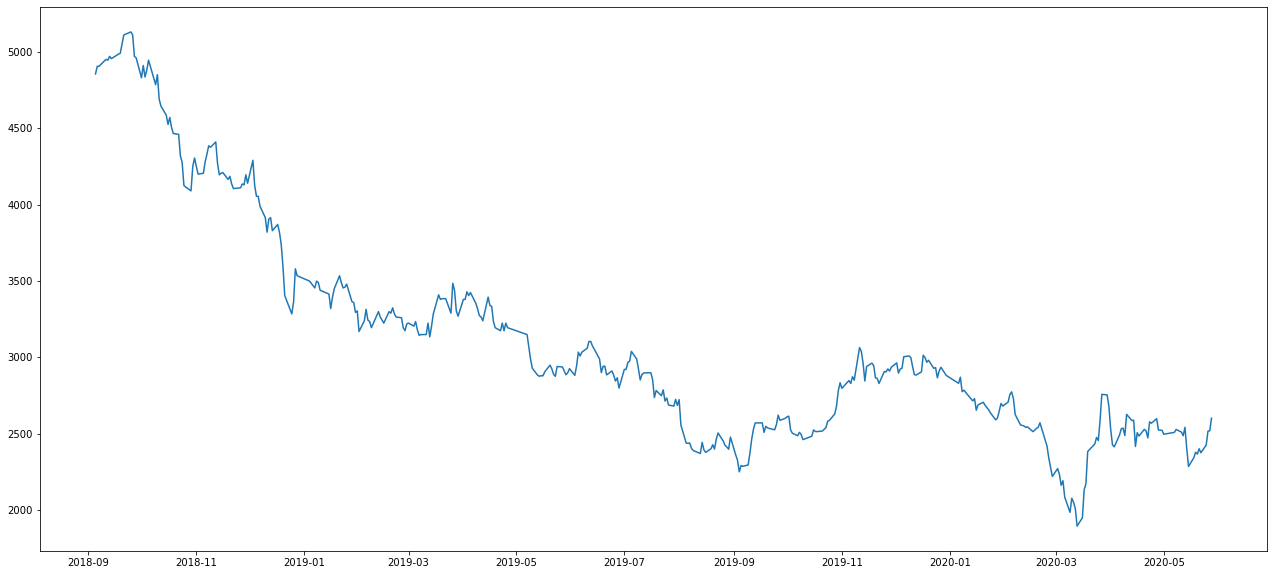

In [32]:
plt.figure(figsize=(22,10))
plt.plot(Y_test, label = 'Test')
plt.plot(forecast3,label = "lstm-ARIMA--5")
plt.plot(forecast4,label = "ARIMA--5")
plt.title("Time Series Forecast")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

In [33]:
LA_error = forecast-Y_test[0]
A_error = forecast-Y_test[0]
L_error = Predict[0]-Y_test[0]
zero = Y_test
zero[0] = 0

In [34]:
LA_rows_to_drop = LA_error.index[LA_error >= 500]
A_rows_to_drop = A_error.index[A_error >= 500]
L_rows_to_drop = L_error.index[L_error >= 500]

In [35]:
LA = LA_error.drop(LA_rows_to_drop)
A = A_error.drop(A_rows_to_drop)
L = L_error.drop(L_rows_to_drop)

C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 21270 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 22793 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\home\anaconda\envs\TF\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 21270 missing from curre

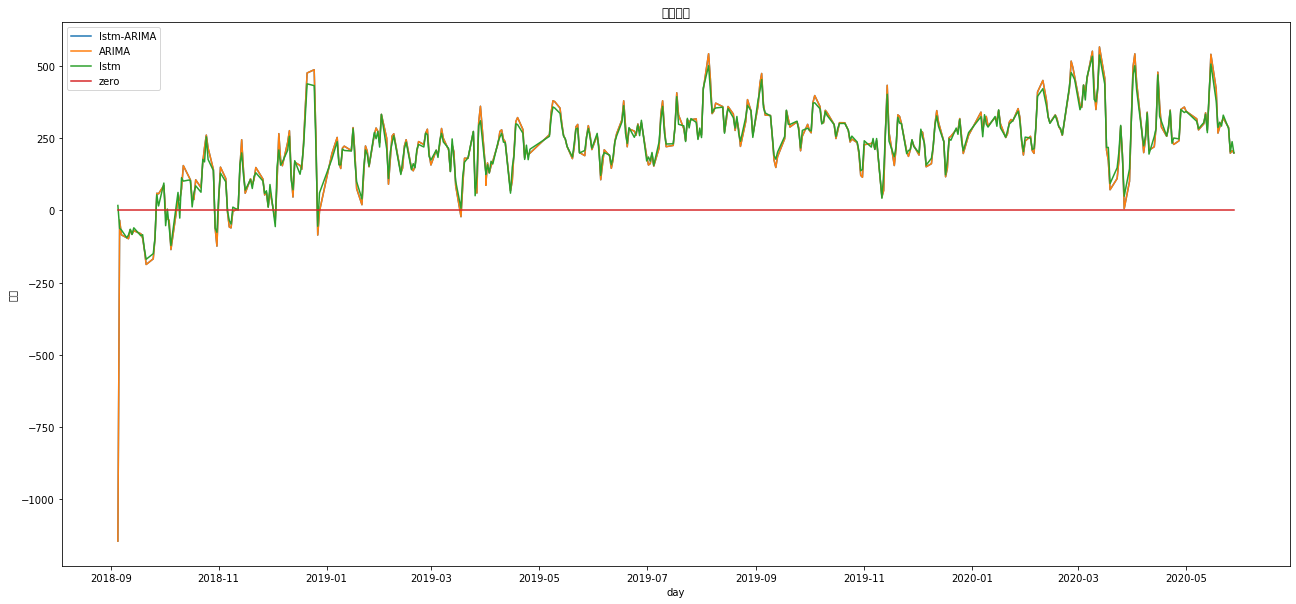

In [36]:
plt.figure(figsize=(22,10))
plt.plot(LA_error,label = "lstm-ARIMA")
plt.plot(A_error,label = "ARIMA")
plt.plot(L_error,label = "lstm")
plt.plot(zero,label = "zero")
plt.title("値の変化")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

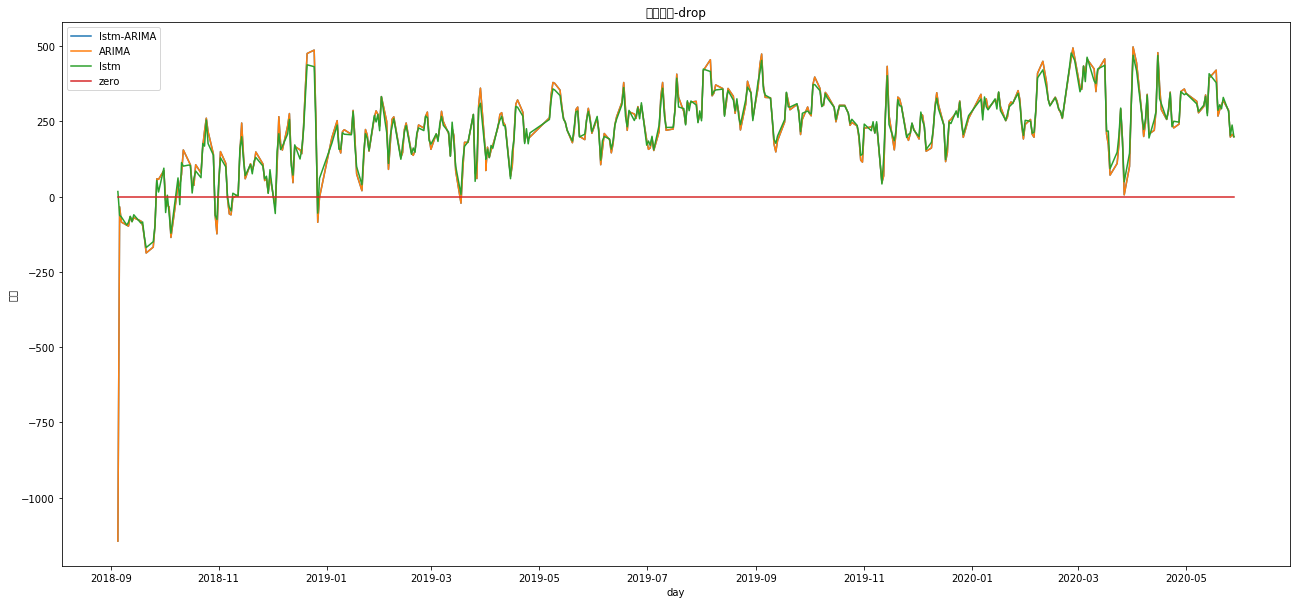

In [37]:
plt.figure(figsize=(22,10))
plt.plot(LA,label = "lstm-ARIMA")
plt.plot(A,label = "ARIMA")
plt.plot(L,label = "lstm")
plt.plot(zero,label = "zero")
plt.title("値の変化-drop")
plt.xlabel("day")
plt.ylabel("終値")
plt.legend()
plt.show()

In [53]:
LA = LA.drop_duplicates()
LA[LA.index.duplicated(keep=False)]
print(LA.resample('D').interpolate())

ValueError: cannot reindex from a duplicate axis

In [55]:
LA.index=="2019-04-01"
LA.index.get_loc("2019-04-01")

slice(136, 138, None)

In [44]:
LA.index

DatetimeIndex(['2018-09-05', '2018-09-06', '2018-09-07', '2018-09-10',
               '2018-09-11', '2018-09-12', '2018-09-13', '2018-09-14',
               '2018-09-18', '2018-09-19',
               ...
               '2020-05-14', '2020-05-18', '2020-05-19', '2020-05-20',
               '2020-05-21', '2020-05-22', '2020-05-25', '2020-05-26',
               '2020-05-27', '2020-05-28'],
              dtype='datetime64[ns]', name='day', length=410, freq=None)

In [63]:
print(LA[LA.index.duplicated(keep=False)])

day
2019-04-01    260.477804
2019-04-01    159.747130
dtype: float64


In [64]:
LA.drop_duplicates()

day
2018-09-05   -1101.540010
2018-09-06     -68.131951
2018-09-07    -104.838565
2018-09-10    -140.390240
2018-09-11    -148.586958
                 ...     
2020-05-22     473.173049
2020-05-25     389.786934
2020-05-26     286.371389
2020-05-27     342.417399
2020-05-28     262.272795
Length: 385, dtype: float64

# Conv1D

In [17]:
X = df.iloc[:, 4]
print(X)

0      4745.0
1      4625.0
2      4505.0
3      4445.0
4      4495.0
        ...  
764    2377.0
765    2427.0
766    2518.0
767    2520.0
768    2603.0
Name: end, Length: 769, dtype: float64


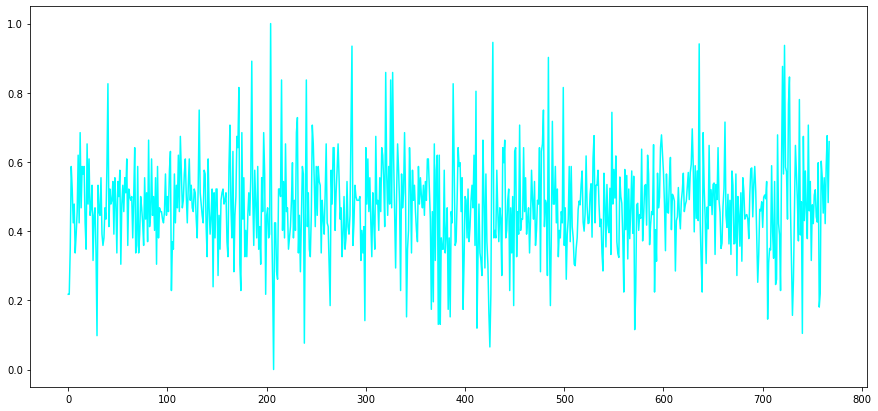

In [18]:
scaler = MinMaxScaler(feature_range=(0,1))
X_tmp = X.dropna()
X_tmp = X_tmp.diff().dropna() # 差分（変動）の系列にする
X_tmp = np.array(X_tmp.values).reshape(-1,1) # numpy配列にする
X_tmp = scaler.fit_transform(X_tmp) # 正規化
plt.figure(figsize=(15,7))
plt.plot(X_tmp, color="cyan")
plt.show()

教師データ件数:  718
[[0.2173913  0.2173913  0.3478261  0.5869565  0.5217391  0.42391303
  0.47826087 0.33695653 0.39130434 0.45652175 0.6195652  0.42391303
  0.6847826  0.4673913  0.5869565  0.5652174  0.5869565  0.42391303
  0.3478261  0.65217394 0.47826087 0.6086956  0.4456522  0.4673913
  0.5326087  0.3152174  0.4456522  0.4673913  0.33695653 0.09782609
  0.5326087  0.45652175 0.4456522  0.5543478  0.39130434 0.35869566
  0.38043478 0.4673913  0.4347826  0.5869565  0.82608694 0.41304347
  0.5217391  0.47826087 0.48913044 0.54347825 0.39130434 0.5543478
  0.47826087 0.33695653]]


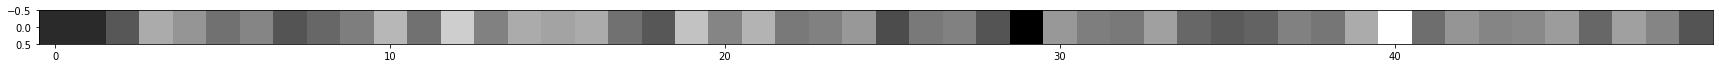

[[0.2173913  0.3478261  0.5869565  0.5217391  0.42391303 0.47826087
  0.33695653 0.39130434 0.45652175 0.6195652  0.42391303 0.6847826
  0.4673913  0.5869565  0.5652174  0.5869565  0.42391303 0.3478261
  0.65217394 0.47826087 0.6086956  0.4456522  0.4673913  0.5326087
  0.3152174  0.4456522  0.4673913  0.33695653 0.09782609 0.5326087
  0.45652175 0.4456522  0.5543478  0.39130434 0.35869566 0.38043478
  0.4673913  0.4347826  0.5869565  0.82608694 0.41304347 0.5217391
  0.47826087 0.48913044 0.54347825 0.39130434 0.5543478  0.47826087
  0.33695653 0.54347825]]


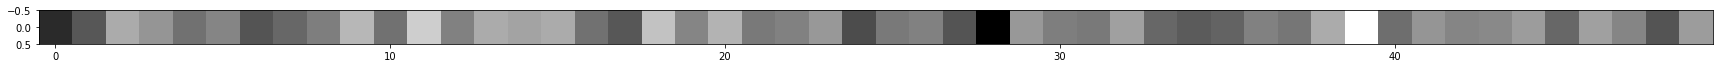

[[0.3478261  0.5869565  0.5217391  0.42391303 0.47826087 0.33695653
  0.39130434 0.45652175 0.6195652  0.42391303 0.6847826  0.4673913
  0.5869565  0.5652174  0.5869565  0.42391303 0.3478261  0.65217394
  0.47826087 0.6086956  0.4456522  0.4673913  0.5326087  0.3152174
  0.4456522  0.4673913  0.33695653 0.09782609 0.5326087  0.45652175
  0.4456522  0.5543478  0.39130434 0.35869566 0.38043478 0.4673913
  0.4347826  0.5869565  0.82608694 0.41304347 0.5217391  0.47826087
  0.48913044 0.54347825 0.39130434 0.5543478  0.47826087 0.33695653
  0.54347825 0.5       ]]


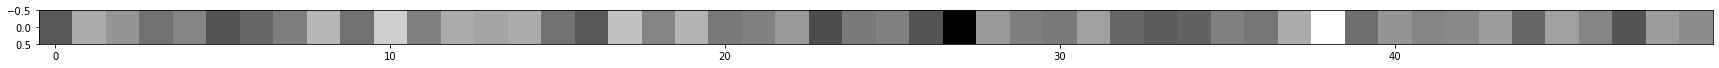

[[0.5869565  0.5217391  0.42391303 0.47826087 0.33695653 0.39130434
  0.45652175 0.6195652  0.42391303 0.6847826  0.4673913  0.5869565
  0.5652174  0.5869565  0.42391303 0.3478261  0.65217394 0.47826087
  0.6086956  0.4456522  0.4673913  0.5326087  0.3152174  0.4456522
  0.4673913  0.33695653 0.09782609 0.5326087  0.45652175 0.4456522
  0.5543478  0.39130434 0.35869566 0.38043478 0.4673913  0.4347826
  0.5869565  0.82608694 0.41304347 0.5217391  0.47826087 0.48913044
  0.54347825 0.39130434 0.5543478  0.47826087 0.33695653 0.54347825
  0.5        0.57608694]]


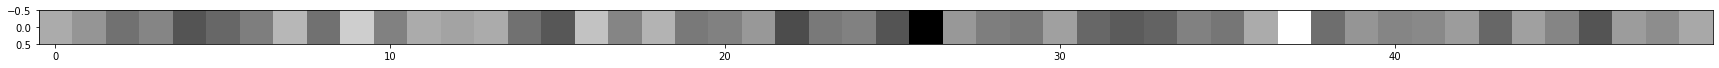

[[0.5217391  0.42391303 0.47826087 0.33695653 0.39130434 0.45652175
  0.6195652  0.42391303 0.6847826  0.4673913  0.5869565  0.5652174
  0.5869565  0.42391303 0.3478261  0.65217394 0.47826087 0.6086956
  0.4456522  0.4673913  0.5326087  0.3152174  0.4456522  0.4673913
  0.33695653 0.09782609 0.5326087  0.45652175 0.4456522  0.5543478
  0.39130434 0.35869566 0.38043478 0.4673913  0.4347826  0.5869565
  0.82608694 0.41304347 0.5217391  0.47826087 0.48913044 0.54347825
  0.39130434 0.5543478  0.47826087 0.33695653 0.54347825 0.5
  0.57608694 0.3043478 ]]


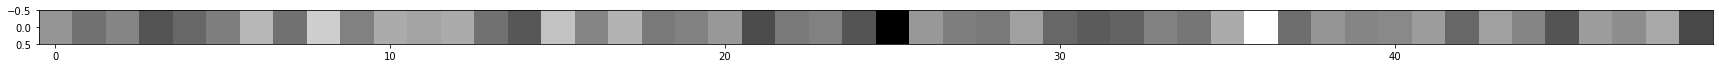

In [19]:
SEQ_SIZE = 50
 
dataset = []
for i in range(len(X_tmp)-SEQ_SIZE): # SEQ_SIZE分の系列をとり、その次の値が上がっているか下がっているかのラベルにする
    x = X_tmp[i:i+SEQ_SIZE]
    t_tmp = X_tmp[i+SEQ_SIZE]
    t = 1 # 上がっている
    if x[-1] > t_tmp: # 下がっている
        t = 0
    x = np.array(x, dtype="float32").reshape(1, 1,SEQ_SIZE) # 畳み込みニューラルネットワークにするので、時系列は１次元の画像と見立てる (in_channel, height_size, width_size)
    t = np.array(t, dtype="int32")
    dataset.append((x,t))
N = len(dataset)
 
print("教師データ件数: ", N)
 
# 一部確認してみる
for i in range(5):
    print(dataset[i][0][0])
    plt.figure(figsize=(30,140))
    plt.imshow(dataset[i][0][0], cmap="gray")
    plt.show()

In [20]:
import chainer
from chainer import Chain, optimizers, training,  Variable,  serializers
from chainer.training import extensions
import chainer.functions as F
import chainer.links as L

C:\home\anaconda\envs\TF\lib\site-packages\chainer\_environment_check.py:86: UserWarning: 
--------------------------------------------------------------------------------
CuPy (cupy) version 6.0.0 may not be compatible with this version of Chainer.
Please consider installing the supported version by running:
  $ pip install 'cupy>=7.0.0,<8.0.0'

See the following page for more details:
  https://docs-cupy.chainer.org/en/latest/install.html
--------------------------------------------------------------------------------

  requirement=requirement, help=help))
C:\home\anaconda\envs\TF\lib\site-packages\chainer\_environment_check.py:104: UserWarning: 
--------------------------------------------------------------------------------
Multiple installations of CuPy package has been detected.
You should select only one package from from ['cupy-cuda101', 'cupy-cuda100', 'cupy-cuda92', 'cupy-cuda91', 'cupy-cuda90', 'cupy-cuda80', 'cupy'].
Follow these steps to resolve this issue:
  1. `pip list

In [21]:
class CNN(Chain):
    def __init__(self):
        # クラスの初期化
        super(CNN, self).__init__(            
            conv1 = L.Convolution2D(1, 20, (1,5)),
            conv2 = L.Convolution2D(20, 50, (1,5)),
            l1 = L.Linear(None, 100),
            l2 = L.Linear(None, 100),
            l3 = L.Linear(None, 2)
        )
 
    def __call__(self, x):
        # 順伝播の計算を行う関数
        # :param x: 入力値
        h = F.max_pooling_2d(F.relu(self.conv1(x)), 2,stride=4)
        h = F.max_pooling_2d(F.relu(self.conv2(h)), 2,stride=2)
        h = F.relu(self.l1(h))
        h = F.relu(self.l2(h))
        y = self.l3(h)
        return y

In [34]:
EPOCH_NUM = 50
BATCH_SIZE = 200
 
# モデルの定義
model = L.Classifier(CNN())
optimizer = optimizers.Adam()
optimizer.setup(model)

In [35]:
def predict(model, x_data):
    x = np.array(x_data)#Variable.astype(np.float32)
    y = model.predictor(x)
    return np.argmax(y.data, axis = 1)

In [36]:
X = np.concatenate([X1, X2, X3], axis=1)  # numpy配列を結合する。

scaler.fit(X)  # スケーリングに使用する最小／最大値を計算する。
X = scaler.transform(X)  # Xをを0～1の範囲にスケーリングする。
scaler1.fit(Y)  # スケーリングに使用する最小／最大値を計算する。
Y = scaler1.transform(Y)  # Yをを0～1の範囲にスケーリングする。

X = np.reshape(X, (X.shape[0], 1, 1, X.shape[1]))  # 3次元配列に変換する。

# train, testデータを定義
X_train = X[:350, :, :]
X_test = X[350:, :, :]
Y_train = Y[:350, :]
Y_test = Y[350:, :]

In [37]:
# 学習開始
print("Train")
split_at = int(len(dataset) * 0.5)
train, test = chainer.datasets.split_dataset_random(dataset, split_at)
train_iter = chainer.iterators.SerialIterator(train, BATCH_SIZE)
test_iter = chainer.iterators.SerialIterator(test, BATCH_SIZE, repeat=False, shuffle=False)
updater = training.StandardUpdater(train_iter, optimizer, device=-1)
trainer = training.Trainer(updater, (EPOCH_NUM, "epoch"), out="result")
trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],'epoch', file_name='loss.png'))
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],'epoch', file_name='accuracy.png'))
trainer.extend(extensions.PrintReport( ["epoch", "main/loss", "validation/main/loss", "main/accuracy", "validation/main/accuracy", "elapsed_time"])) # エポック、学習損失、テスト損失、学習正解率、テスト正解率、経過時間
#trainer.extend(extensions.ProgressBar()) # プログレスバー出力
trainer.run()

Train
epoch       main/loss   validation/main/loss  main/accuracy  validation/main/accuracy  elapsed_time
1           0.696202    0.698265              0.465          0.494505                  0.0663631     
2           0.695716    0.696452              0.5            0.489011                  0.37528       
3           0.69104     0.694122              0.515          0.483516                  0.749011      
4           0.690003    0.693079              0.59           0.521978                  1.08939       
5           0.689369    0.692729              0.54           0.543956                  1.40043       
6           0.68436     0.693008              0.64           0.510989                  1.71363       
7           0.684307    0.69455               0.65           0.478022                  2.02311       
8           0.683113    0.695337              0.54           0.478022                  2.33456       
9           0.680926    0.694561              0.53           0.483516         

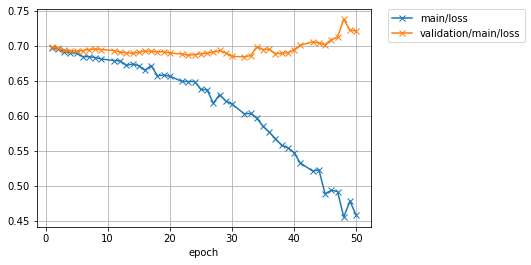

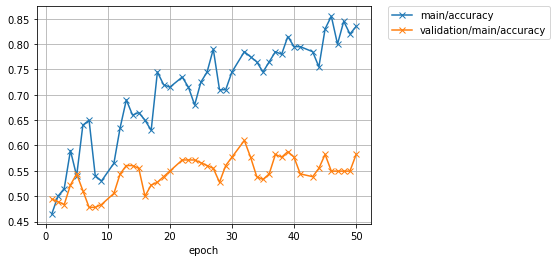

In [38]:
from IPython.display import Image, display_png

display_png(Image('result/loss.png'))
display_png(Image('result/accuracy.png'))

In [39]:
print(predict(model, dataset))

InvalidType: 
Invalid operation is performed in: Convolution2DFunction (Forward)

Expect: in_types[0].dtype.kind == f
Actual: O != f

In [30]:
np.array(dataset)

array([[array([[[0.2173913 , 0.3478261 , 0.5869565 , 0.5217391 , 0.42391303,
         0.47826087, 0.33695653, 0.39130434, 0.45652175, 0.6195652 ,
         0.42391303, 0.6847826 , 0.4673913 , 0.5869565 , 0.5652174 ,
         0.5869565 , 0.42391303, 0.3478261 , 0.65217394, 0.47826087,
         0.6086956 , 0.4456522 , 0.4673913 , 0.5326087 , 0.3152174 ,
         0.4456522 , 0.4673913 , 0.33695653, 0.09782609, 0.5326087 ,
         0.45652175, 0.4456522 , 0.5543478 , 0.39130434, 0.35869566,
         0.38043478, 0.4673913 , 0.4347826 , 0.5869565 , 0.82608694,
         0.41304347, 0.5217391 , 0.47826087, 0.48913044, 0.54347825,
         0.39130434, 0.5543478 , 0.47826087, 0.33695653, 0.54347825]]],
      dtype=float32),
        array(0)],
       [array([[[0.5869565 , 0.5217391 , 0.42391303, 0.47826087, 0.33695653,
         0.39130434, 0.45652175, 0.6195652 , 0.42391303, 0.6847826 ,
         0.4673913 , 0.5869565 , 0.5652174 , 0.5869565 , 0.42391303,
         0.3478261 , 0.65217394, 0.47826087

In [27]:
data = np.array([])
new_data = data.astype(np.float32)
for i in range(0,355):
    new_data = np.append(new_data,dataset.pop(i))

In [29]:
np.array(new_data)

array([array([[[0.2173913 , 0.2173913 , 0.3478261 , 0.5869565 , 0.5217391 ,
         0.42391303, 0.47826087, 0.33695653, 0.39130434, 0.45652175,
         0.6195652 , 0.42391303, 0.6847826 , 0.4673913 , 0.5869565 ,
         0.5652174 , 0.5869565 , 0.42391303, 0.3478261 , 0.65217394,
         0.47826087, 0.6086956 , 0.4456522 , 0.4673913 , 0.5326087 ,
         0.3152174 , 0.4456522 , 0.4673913 , 0.33695653, 0.09782609,
         0.5326087 , 0.45652175, 0.4456522 , 0.5543478 , 0.39130434,
         0.35869566, 0.38043478, 0.4673913 , 0.4347826 , 0.5869565 ,
         0.82608694, 0.41304347, 0.5217391 , 0.47826087, 0.48913044,
         0.54347825, 0.39130434, 0.5543478 , 0.47826087, 0.33695653]]],
      dtype=float32),
       array(1),
       array([[[0.3478261 , 0.5869565 , 0.5217391 , 0.42391303, 0.47826087,
         0.33695653, 0.39130434, 0.45652175, 0.6195652 , 0.42391303,
         0.6847826 , 0.4673913 , 0.5869565 , 0.5652174 , 0.5869565 ,
         0.42391303, 0.3478261 , 0.65217394, 0.

In [ ]:
X.shape[1]